## Installations and Imports :



In [ ]:
!pip install sklearn librosa mir_eval tensorflow

In [3]:
#!/usr/bin/env python3
import argparse

from numpy.lib.npyio import save
from Models import MLP, CNN
from Datasets import IsophonicsDataset 
import sklearn
import sys

In [4]:
#!/usr/bin/env python3
parser = argparse.ArgumentParser()
parser.add_argument("--audio_directory", default="C:\\Users\\vojte\\Documents\\All documents 2010 till now\\MFF files\\3. ročník\\Bakalarka\\Datasets\\Isophonics\\AUDIO", type=str, help="Path to directory with audio files.")
parser.add_argument("--annotations_directory", default="C:\\Users\\vojte\\Documents\\All documents 2010 till now\\MFF files\\3. ročník\\Bakalarka\\Datasets\\Isophonics\\ANNOTATIONS", type=str, help="Path to directory with chord annotations.")
parser.add_argument("--test_size", default=0.3, type=lambda x:int(x) if x.isdigit() else float(x), help="Test set size")
parser.add_argument("--seed", default=42, type=int, help="Random seed")

args = parser.parse_args([] if "__file__" not in globals() else None)

## Basic models, all data transposed to C key :

[INFO] The Dataset was loaded successfully.
[INFO] The MLP model was successfully created.
[INFO] The MLP model was successfully trained.

 Dev accuracy:  40.87 % 



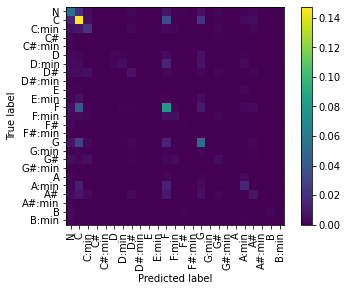

In [ ]:
#!/usr/bin/env python3

# Prepare data
x, y = IsophonicsDataset.load_preprocessed_dataset("./PreprocessedDatasets/isophonics_5_true_500_1_true.ds")
train_x, dev_x, train_y, dev_y = sklearn.model_selection.train_test_split(x, y, test_size=args.test_size, random_state=args.seed)

# Create model
mlp_model = MLP()

# Train model
mlp_model.fit(train_x, train_y)

# Display score
print("\n","Dev accuracy: ", "{:.2f}".format(100*mlp_model.score(dev_x, dev_y)), "%", "\n")
mlp_model.display_confusion_matrix(dev_x, dev_y)

[INFO] The Dataset was loaded successfully.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 126, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 21504)             0         
_________________________________________________________________
dense (Dense

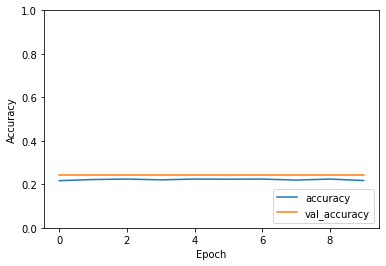

75/75 - 0s - loss: 2.5052 - accuracy: 0.2406

 Dev accuracy:  24.06 % 



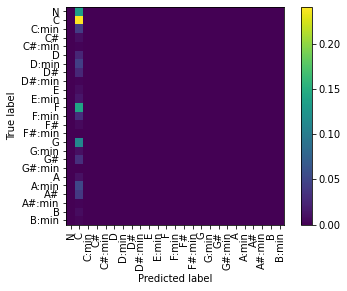

In [5]:
#!/usr/bin/env python3
# Prepare data
x, y = IsophonicsDataset.load_preprocessed_dataset("./PreprocessedDatasets/isophonics_32_false_10_500_true.ds")
a, b, c = x.shape
x = x.reshape((a,b,c,1))
train_x, dev_x, train_y, dev_y = sklearn.model_selection.train_test_split(x, y, test_size=args.test_size, random_state=args.seed)

# Create model
cnn_model = CNN(input_shape=(b, c, 1), output_classes=25)

# Train model
cnn_model.fit(train_x, train_y, dev_x, dev_y)

# Display score
cnn_model.display_training_progress()
print("\n","Dev accuracy: ", "{:.2f}".format(100*cnn_model.score(dev_x, dev_y)), "%", "\n")
cnn_model.display_confusion_matrix(dev_x, dev_y)

## Basic MLP model :

[INFO] The Dataset was loaded successfully.
[INFO] The MLP model was successfully created.
[INFO] The MLP model was successfully trained.

 Dev accuracy:  27.31 % 



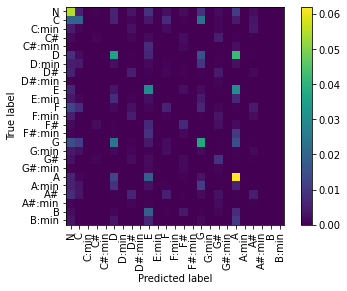

In [ ]:
#!/usr/bin/env python3

# Prepare data
x, y = IsophonicsDataset.load_preprocessed_dataset("./PreprocessedDatasets/isophonics_5_true_500_1.ds")
train_x, dev_x, train_y, dev_y = sklearn.model_selection.train_test_split(x, y, test_size=args.test_size, random_state=args.seed)

# Create model
mlp_model = MLP()

# Train model
mlp_model.fit(train_x, train_y)

# Display score
print("\n","Dev accuracy: ", "{:.2f}".format(100*mlp_model.score(dev_x, dev_y)), "%", "\n")
mlp_model.display_confusion_matrix(dev_x, dev_y)

## Basic CNN model :

[INFO] The Dataset was loaded successfully.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 126, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 30, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 28, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 7168)              0         
_________________________________________________________________
dense (Dense

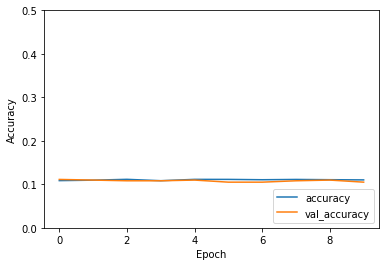

732/732 - 3s - loss: 2.8852 - accuracy: 0.1049

 Dev accuracy:  10.49 % 



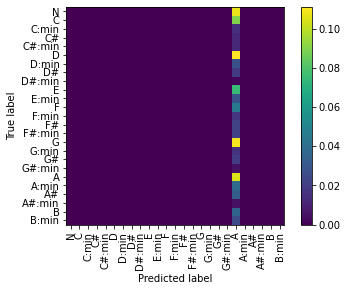

In [ ]:
#!/usr/bin/env python3
# Prepare data
x, y = IsophonicsDataset.load_preprocessed_dataset("./PreprocessedDatasets/isophonics_16_false_100_5.ds")
a, b, c = x.shape
x = x.reshape((a,b,c,1))
train_x, dev_x, train_y, dev_y = sklearn.model_selection.train_test_split(x, y, test_size=args.test_size, random_state=args.seed)

# Create model
cnn_model = CNN(input_shape=(b, c, 1), output_classes=25)

# Train model
cnn_model.fit(train_x, train_y, dev_x, dev_y)

# Display score
cnn_model.display_training_progress()
print("\n","Dev accuracy: ", "{:.2f}".format(100*cnn_model.score(dev_x, dev_y)), "%", "\n")
cnn_model.display_confusion_matrix(dev_x, dev_y)

## MIR_EVAL score evaluation, ToDo :

In [ ]:
 #!/usr/bin/env python3
 
 #print(MLP.mir_score("./Datasets/Isophonics/ANNOTATIONS/Across_the_Universe.lab", "./Datasets/Isophonics/ANNOTATIONS/a.lab"))